# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Bryan Raihan 'Ilman
- **Email:** bryan.raihan@ui.ac.id
- **ID Dicoding:** bryan_ilman

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda per bulan selama tahun 2011 dan 2012?
- Berapakah jumlah penyewaan sepeda pada hari kerja dan hari libur (termasuk weekend)?
- Pada jam berapa sepeda paling banyak disewa (kolom ‘hr’)?

## Import Semua Packages/Library yang Digunakan

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [83]:
df_day = pd.read_csv("data/day.csv")
df_hour = pd.read_csv("data/hour.csv")

In [84]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [85]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- Missing value

Tidak ditemukan _missing value_ sama sekali pada `day.csv` dan `hour.csv`.

In [86]:
print('The overall count of missing values for each column in the "day" dataframe:')
print(df_day.isna().sum())

The overall count of missing values for each column in the "day" dataframe:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [87]:
print('The overall count of missing values for each column in the "hour" dataframe:')
print(df_hour.isna().sum())

The overall count of missing values for each column in the "hour" dataframe:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


- Duplicate data

Tidak ditemukan _duplicate value_ sama sekali pada `day.csv` dan `hour.csv`.

In [88]:
print('The overall count of duplicate entries in the "day" dataframe:', df_day.duplicated().sum())
print('The overall count of duplicate entries in the "hour" dataframe:', df_hour.duplicated().sum())

The overall count of duplicate entries in the "day" dataframe: 0
The overall count of duplicate entries in the "hour" dataframe: 0


### Cleaning Data

- Remove ID

ID tidak relevan dalam analisis data sehingga perlu dibuang.

In [89]:
df_day.drop('instant', axis=1, inplace=True)
df_hour.drop('instant', axis=1, inplace=True)

- Fix data type

In [90]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

## Exploratory Data Analysis (EDA)

### Explore ...

Beberapa informasi penting yang dapat diperoleh dari `day.csv` adalah sebagai berikut. Pertama, rata-rata pengguna _bike sharing_ harian adalah 4504, dimana sebagian besar (3656) adalah _registered user_, dan sisanya (848) adalah _casual user_. Selama tahun 2011 dan 2012, kondisi cuaca rata-ratanya cerah, dengan suhu rata-rata sedang.

In [91]:
df_day.describe()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Korelasi antara 'cnt' dan 'registered' hampir positif sempurna (0.9455), yang berarti kenaikan dalam 'registered' sangat erat terkait dengan kenaikan dalam 'cnt'. Selain itu, 'temp' dan 'cnt' juga memiliki korelasi yang kuat (0.6275), menunjukkan bahwa lebih banyak orang cenderung menggunakan layanan bike sharing ketika suhu meningkat.

In [92]:
df_day.corr(numeric_only=True)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


Angka 3 menandakan musim _fall_. Terlihat bahwa jumlah penggunaan _bike sharing_ paling tinggi terjadi pada musim _fall_ dan paling rendah pada musim _spring_, yang ditunjukkan dengan angka 1.

In [93]:
df_day.groupby(by='season').agg({
    'cnt': 'mean',
})

,cnt
season,
1,2604.132597
2,4992.331522
3,5644.303191
4,4728.162921


Angka 1 menandakan cuaca cerah. Terlihat bahwa jumlah penggunaan _bike sharing_ paling tinggi terjadi pada cuaca cerah dan paling rendah pada musim cuaca hujan, yang ditunjukkan dengan angka 4.

In [94]:
df_hour.groupby(by='weathersit').agg({
    'cnt': 'mean',
})

,cnt
weathersit,
1,204.869272
2,175.165493
3,111.579281
4,74.333333


## Visualization & Explanatory Analysis

### Bagaimana tren jumlah penyewaan sepeda per bulan selama tahun 2011 dan 2012?

Pada tahun 2012, tren penggunaan bike sharing terus meningkat setiap bulan dan mencapai puncaknya pada bulan September, yang merupakan akhir dari musim _fall_ dan awal dari musim _winter_. Setelah itu, penggunaan mengalami penurunan terus menerus hingga akhir tahun. Sedangkan pada tahun 2011, tren penggunaan bike sharing memuncak pada bulan Juni dan menurun terus setelahnya hingga akhir tahun.

Baik pada tahun 2011 dan tahun 2012, bulan Januari merupakan bulan dengan penggunaan bike sharing terendah. Terlihat bahwa pada setiap bulan, jumlah pengguna bike sharing pada tahun 2012 secara signifikan lebih banyak daripada pada bulan yang sama tahun sebelumnya.

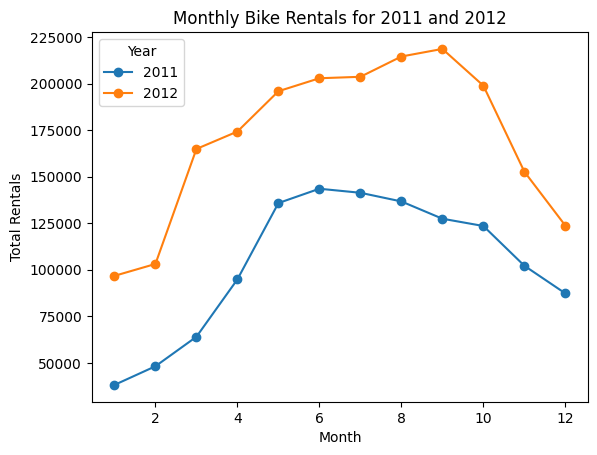

In [95]:
monthly_rentals = df_day.groupby([df_day['dteday'].dt.year.rename('Year'), df_day['dteday'].dt.month.rename('Month')])['cnt'].sum().reset_index()

pivot_df = monthly_rentals.pivot(index='Month', columns='Year', values='cnt')

pivot_df.plot(kind='line', marker='o')

plt.title('Monthly Bike Rentals for 2011 and 2012')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.legend(title='Year', loc='upper left')

plt.show()

### Berapakah jumlah penyewaan sepeda pada hari kerja dan hari libur (termasuk weekend)?

Jumlah pengguna _bike sharing_ lebih banyak di hari kerja dibanding di hari libur (termasuk weekend).

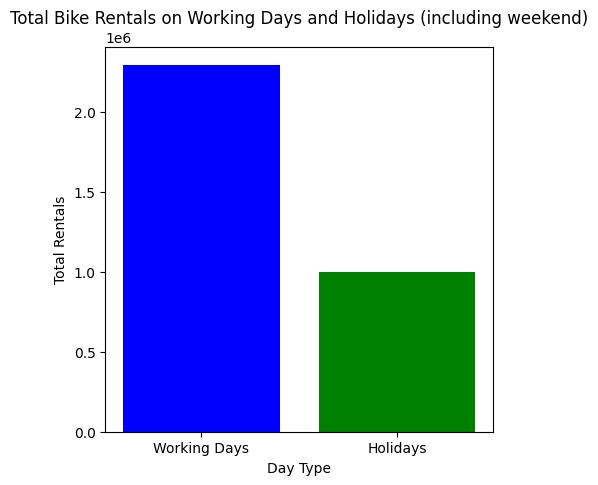

In [96]:
# calculate total rentals for working days and holidays
total_rentals_working_days = df_day[df_day['workingday'] == 1]['cnt'].sum()
total_rentals_holidays_or_weekend = df_day[(df_day['holiday'] == 1) | (df_day['workingday'] == 0)]['cnt'].sum()

data = {'Working Days': total_rentals_working_days, 'Holidays': total_rentals_holidays_or_weekend}
names = list(data.keys())
values = list(data.values())

plt.figure(figsize=(5, 5))
plt.bar(names, values, color=['blue', 'green'])
plt.title('Total Bike Rentals on Working Days and Holidays (including weekend)')
plt.xlabel('Day Type')
plt.ylabel('Total Rentals')
plt.show()

### Pada jam berapa sepeda paling banyak disewa (kolom ‘hr’)?

Jumlah pengguna _bike sharing_ mengalami lonjakan signifikan pada jam 8 pagi dan jam 5 sore. Pada siang hari, jumlah pengguna bisa dikatakan stabil. Terlihat bahwa jumlah pengguna turun drastis pada larut malam.

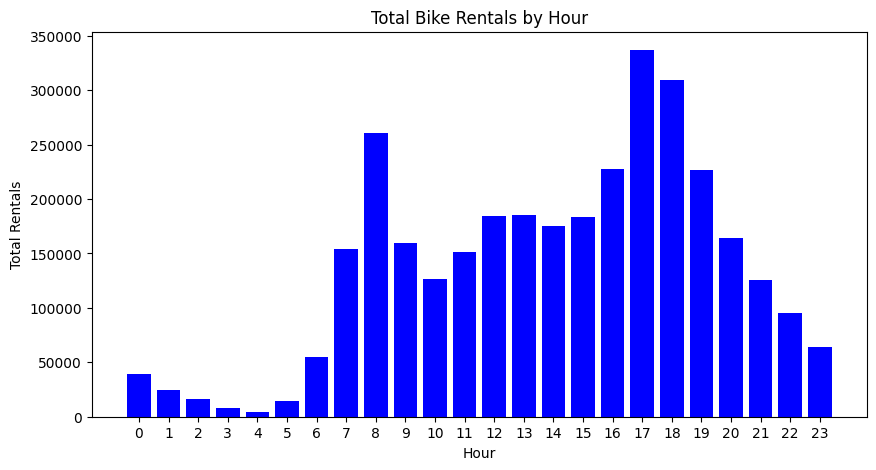

In [97]:
# Group by 'hr', then get the sums of 'cnt'
hourly_rentals = df_hour.groupby('hr')['cnt'].sum()

plt.figure(figsize=(10, 5))
plt.bar(hourly_rentals.index, hourly_rentals.values, color='blue')

plt.title('Total Bike Rentals by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Rentals')
plt.xticks(range(24))

plt.show()

## Conclusion

- Tren penggunaan layanan berbagi sepeda menunjukkan peningkatan setiap bulannya pada tahun 2012, mencapai puncaknya pada bulan September, sementara pada tahun 2011, puncak penggunaan terjadi pada bulan Juni. Jumlah pengguna lebih banyak pada tahun 2012.
- Jumlah pengguna bike sharing lebih banyak pada hari kerja daripada hari libur (termasuk weekend).
- Terjadi lonjakan penggunaan bike sharing pada jam 8 pagi dan 5 sore, stabil di siang hari, dan menurun drastis di larut malam.